In [24]:
# # # import pandas as pd
# # # from sklearn.feature_extraction.text import TfidfVectorizer
# # # from sklearn.decomposition import TruncatedSVD
# # # from sklearn.cluster import KMeans
# # # from sklearn.model_selection import train_test_split
# # # from sklearn.metrics import accuracy_score
# # # from sklearn.pipeline import Pipeline
# # # from nltk.corpus import stopwords
# # # from nltk.stem import PorterStemmer
# # # from sklearn.preprocessing import LabelEncoder
# # # from sklearn.linear_model import LogisticRegression

# # # # Load data
# # # data = pd.read_csv('suicide.csv')

# # # # Preprocessing
# # # stop_words = set(stopwords.words('english'))
# # # stemmer = PorterStemmer()

# # # def preprocess_text(text):
# # #     text = text.lower()
# # #     text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
# # #     text = ' '.join([stemmer.stem(word) for word in text.split()])
# # #     return text

# # # data['clean_text'] = data['Tweet'].apply(preprocess_text)

# # # # Feature extraction
# # # tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# # # tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text'])

# # # # Dimensionality reduction
# # # svd = TruncatedSVD(n_components=100)
# # # svd_matrix = svd.fit_transform(tfidf_matrix)

# # # # Clustering
# # # kmeans = KMeans(n_clusters=2, random_state=42)
# # # kmeans.fit(svd_matrix)

# # # # Assign cluster labels
# # # data['cluster_label'] = kmeans.labels_

# # # # Split data into train and test sets
# # # X_train, X_test, y_train, y_test = train_test_split(svd_matrix, data['label'], test_size=0.2, random_state=42)

# # # # Train classifier
# # # classifier = LogisticRegression()
# # # classifier.fit(X_train, y_train)

# # # # Predictions
# # # y_pred = classifier.predict(X_test)

# # # # Evaluate classifier
# # # accuracy = accuracy_score(y_test, y_pred)
# # # print("Accuracy:", accuracy)

# # import pandas as pd
# # from sklearn.feature_extraction.text import CountVectorizer
# # from sklearn.decomposition import TruncatedSVD
# # from sklearn.cluster import KMeans
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import accuracy_score
# # from sklearn.pipeline import Pipeline
# # from nltk.corpus import stopwords
# # from nltk.stem import PorterStemmer
# # from sklearn.preprocessing import LabelEncoder
# # from sklearn.linear_model import LogisticRegression

# # # Load data
# # data = pd.read_csv('suicide.csv')

# # # Preprocessing
# # stop_words = set(stopwords.words('english'))
# # stemmer = PorterStemmer()

# # def preprocess_text(text):
# #     text = text.lower()
# #     text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
# #     text = ' '.join([stemmer.stem(word) for word in text.split()])
# #     return text

# # data['clean_text'] = data['Tweet'].apply(preprocess_text)

# # # Feature extraction (Bag of Words)
# # count_vectorizer = CountVectorizer(max_features=1000)
# # bow_matrix = count_vectorizer.fit_transform(data['clean_text'])

# # # Dimensionality reduction
# # svd = TruncatedSVD(n_components=100)
# # svd_matrix = svd.fit_transform(bow_matrix)

# # # Clustering
# # kmeans = KMeans(n_clusters=2, random_state=42)
# # kmeans.fit(svd_matrix)

# # # Assign cluster labels
# # data['cluster_label'] = kmeans.labels_

# # # Split data into train and test sets
# # X_train, X_test, y_train, y_test = train_test_split(svd_matrix, data['label'], test_size=0.2, random_state=42)

# # # Train classifier
# # classifier = LogisticRegression()
# # classifier.fit(X_train, y_train)

# # # Predictions
# # y_pred = classifier.predict(X_test)

# # # Evaluate classifier
# # accuracy = accuracy_score(y_test, y_pred)
# # print("Accuracy:", accuracy)


# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.cluster import KMeans

# # Load data
# data = pd.read_csv('suicide.csv')

# # Drop rows with missing values in the 'Tweet' column
# data.dropna(subset=['Tweet'], inplace=True)

# # Feature extraction (Bag of Words)
# count_vectorizer = CountVectorizer(max_features=1000)
# bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# # Dimensionality reduction
# svd = TruncatedSVD(n_components=100)
# svd_matrix = svd.fit_transform(bow_matrix)

# # Clustering
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(svd_matrix)

# # Assign cluster labels
# data['cluster_label'] = kmeans.labels_

# # Evaluate clustering results (compare with Suicide labels)
# # Implement your evaluation steps here

In [25]:
%pip install pandas
%pip install numpy
%pip install nltk
%pip install scikit-learn
# %pip install re
%pip install matplotlib
%pip install umap

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

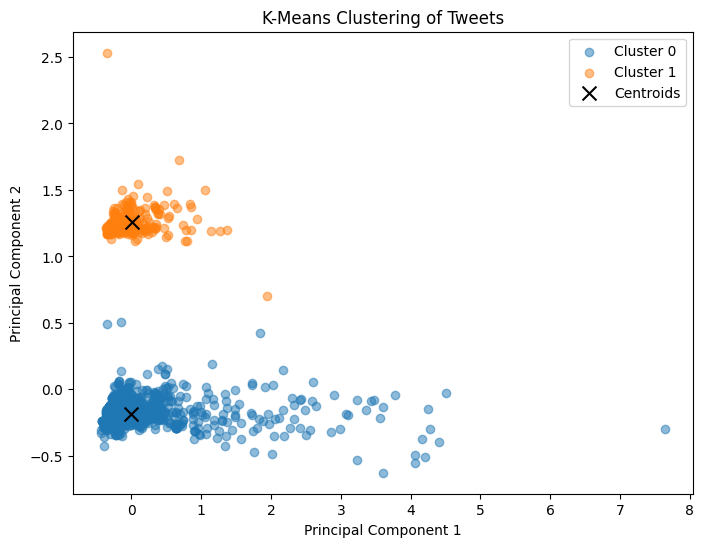

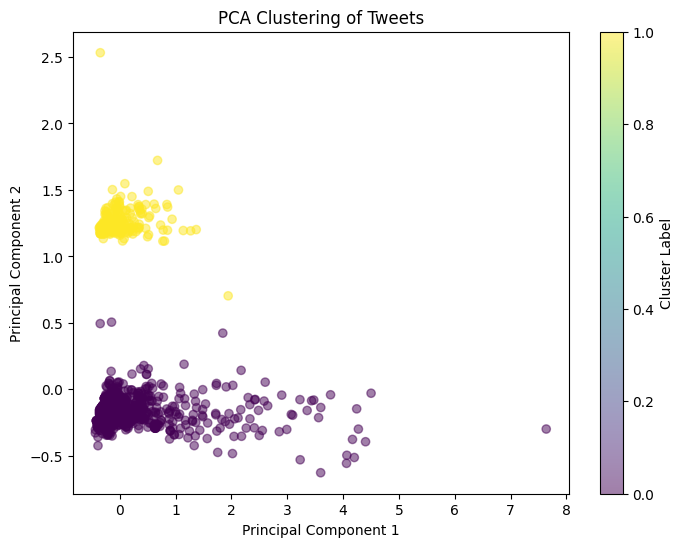

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing values in the 'Tweet' column
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)


# Assign cluster labels
data['cluster_label'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster separately
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
# 
plt.title('K-Means Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
plt.title('PCA Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Assign meaningful labels to clusters using sentiment score

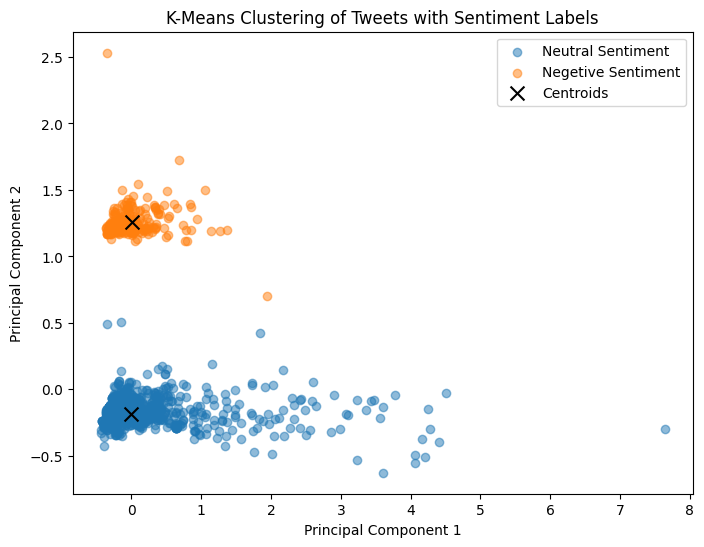

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each tweet

data['sentiment_score'] = data['Tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['Suicide_pred'] = data['sentiment_score'].apply(lambda score: 'Potential Suicide post' if score < 0 else 'Not Suicide post')

cluster_sentiment = data.groupby('cluster_label')['sentiment_score'].mean()

# Assign labels based on sentiment scores
cluster_labels = []
for score in cluster_sentiment:
    if score > 0.1:
        cluster_labels.append('Positive Sentiment')
    elif score < -0.1:
        cluster_labels.append('Negetive Sentiment')
    else:
        cluster_labels.append('Neutral Sentiment')

# Plotting the clusters with meaningful labels
plt.figure(figsize=(8, 6))
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                label=f'{cluster_labels[cluster_label]}', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
# 
plt.title('K-Means Clustering of Tweets with Sentiment Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [28]:
data

,Tweet,Suicide,cluster_label,sentiment_score,Suicide_pred
0,making lunch,Not Suicide post,0,0.0000,Not Suicide post
1,alexia want money,Not Suicide post,0,0.0772,Not Suicide post
2,dizzyhrvy crap took forever put together going...,Potential Suicide post,0,-0.3818,Potential Suicide post
3,jnaylor kiwitweets hey jer since start twittering,Not Suicide post,0,0.0000,Not Suicide post
4,trying quot delicious library quot mixed resul...,Not Suicide post,0,0.7184,Not Suicide post
...,...,...,...,...,...
1782,forgotten much love nokia,Not Suicide post,0,0.5106,Not Suicide post
1783,starting day positive attitude great watch gre...,Not Suicide post,0,0.8271,Not Suicide post
1784,hey give girl credit trying,Not Suicide post,0,0.3818,Not Suicide post
1785,drunken besties stumble room run around sober ...,Not Suicide post,0,0.5267,Not Suicide post


### Evalute Model Using Evaluation Metrics

In [30]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(data['Suicide'], data['Suicide_pred'])

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[997 129   0]
 [  0   0   0]
 [143 516   0]]


In [31]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(data["Suicide"], data["Suicide_pred"])

print("Accuracy:", accuracy)

Accuracy: 0.5585434173669468


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# # Load data
# data = pd.read_csv('suicide.csv')

# # Drop rows with missing values in the 'Tweet' column
# data.dropna(subset=['Tweet'], inplace=True)

# # Initialize VADER sentiment analyzer
# sid = SentimentIntensityAnalyzer()

# # Calculate sentiment scores for each tweet
# data['compound_score'] = data['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# # Feature extraction (Bag of Words)
# count_vectorizer = CountVectorizer()
# bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# # Dimensionality reduction with PCA
# pca = PCA(n_components=2)
# pca_matrix = pca.fit_transform(bow_matrix.toarray())

# # Clustering with K-means
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(pca_matrix)

# # Assign cluster labels
# data['cluster_label'] = kmeans.labels_

# # Plotting the clusters with sentiment scores
# plt.figure(figsize=(10, 8))

# # Plot each cluster separately
# for cluster_label in range(2):
#     plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
#                 pca_matrix[data['cluster_label'] == cluster_label, 1], 
#                 c=data[data['cluster_label'] == cluster_label]['compound_score'], 
#                 cmap='coolwarm', alpha=0.7, label=f'Cluster {cluster_label}')

# plt.title('PCA Clustering of Tweets with Sentiment Scores')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Compound Sentiment Score')
# plt.legend()
# plt.show()

# pca = PCA()
# pca.fit(bow_matrix.toarray())
# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio')
# plt.show()

In [ ]:
# # Step 1: Preprocessing the Data
# import pandas as pd
# import re
# from nltk.tokenize import word_tokenize
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# data = pd.read_csv('suicide.csv')

# def clean_text(text):
#     try:
#         if pd.isna(text):  # Check if text is NaN
#             return ''
#         text = re.sub(r'http\S+', '', text)  # Remove URLs
#         text = re.sub(r'@\w+', '', text)     # Remove mentions
#         text = re.sub(r'&\w+;', '', text)    # Remove HTML entities
#         text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
#         text = text.lower()                  # Convert to lowercase
#         return text
#     except Exception as e:
#         print(f"Error cleaning text: {e}, Text: {text}")
#         return ''  # Return empty string if cleaning fails

# data['cleaned_text'] = data['Tweet'].apply(clean_text)
# data.head()

# # Step 2: Feature Extraction using Bag of Words (BoW)
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()
# X_bow = vectorizer.fit_transform(data['cleaned_text'])

# # Step 3: Sentiment Analysis using VADER
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# sid = SentimentIntensityAnalyzer()

# def vader_sentiment(text):
#     scores = sid.polarity_scores(text)
#     return scores['compound']

# data['sentiment_score'] = data['cleaned_text'].apply(vader_sentiment)

# # Step 4: Dimensionality Reduction
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=100)
# X_svd = svd.fit_transform(X_bow)

# # Step 5: Clustering
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=2)
# kmeans.fit(X_svd)
# data['cluster'] = kmeans.labels_

# # Step 4: Dimensionality Reduction with PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_bow)

# # Plot PCA
# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', alpha=0.5)
# plt.title('PCA Visualization')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
# plt.show()

# # Step 5: Plot KMeans Clustering
# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
# plt.title('KMeans Clustering')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
# plt.legend()
# plt.show()

# # Step 6: Labeling
# # You might label clusters based on manual inspection or domain knowledge

# # Step 7: Evaluation
# # Evaluate the clustering algorithm using metrics like silhouette score or purity

# # Step 8: Deployment (Optional)
# # Deploy the model or pipeline to predict whether new tweets are potential suicide posts or not


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


# Load data
data = pd.read_csv('suicide.csv')


# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)


# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])


# Initial dimensionality reduction with PCA
pca = PCA(n_components=50)  # Reduce to 50 dimensions for t-SNE efficiency
pca_matrix = pca.fit_transform(bow_matrix.toarray())


# Further dimensionality reduction and visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_matrix = tsne.fit_transform(pca_matrix)


# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)


# Plotting
plt.figure(figsize=(8, 6))


# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)


# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')


# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Assuming 'data' is your DataFrame with the 'Tweet' column available


# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])


# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())




# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)
data['cluster_label'] = kmeans.labels_


# PCA Clustering Plot
plt.figure(figsize=(8, 6))
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0],
                pca_matrix[data['cluster_label'] == cluster_label, 1],
                label=f'Cluster {cluster_label}', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
plt.title('PCA Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Explained Variance Plot
pca_full = PCA().fit(bow_matrix.toarray())
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()






# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)


# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])


# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=3000, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())


# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tsne_results)
data['cluster_label'] = kmeans.labels_


# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('t-SNE Clustering of Tweets')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

